In [56]:
# step 5

!pip install fredapi

import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import fred
import yfinance as yfin

In [57]:
def analyze_scenario_data(scenario_name, fred_codes, api_key=None):
    """
    Analyze and visualize data for a specific financial scenario with multiple datasets.

    Parameters:
    - scenario_name (str): A description of the financial scenario.
    - fred_codes (list of str): List of FRED codes for the relevant datasets.
    - api_key (str, optional): The FRED API key (if required).

    Returns:
    - None (displays plots and insights).
    """
    # Define the start date as January 1, 2011
    start_date = datetime.date(2011, 1, 1)
    
    # Define the end date as the current date
    end_date = datetime.date.today()

    # Fetch the data from FRED using the API for each code
    data = {}
    for fred_code in fred_codes:
        data[fred_code] = web.DataReader(fred_code, "fred", start_date, end_date, api_key=api_key)

    # Display the first few rows of the data for each dataset
    for fred_code, dataset in data.items():
        print(f"{scenario_name} - {fred_code} Data:")
        print(dataset.head())

  # Exploratory Data Analysis (EDA) for each dataset
        # Determine whether to draw separate time series plots or a combined plot
    if "relationship" in scenario_name.lower() and len(fred_codes) == 2:
        # Combine datasets in a single time series plot with two y-labels
        plt.figure(figsize=(12, 6))
        for fred_code, dataset in data.items():
            if fred_code == fred_codes[0]:
                ax1 = plt.gca()
                plt.plot(dataset.index, dataset[fred_code], label=f"{scenario_name} - {fred_code}", color='blue')
                plt.ylabel(f"{scenario_name} - {fred_code} Data")
            elif fred_code == fred_codes[1]:
                ax2 = ax1.twinx()
                plt.plot(dataset.index, dataset[fred_code], label=f"{scenario_name} - {fred_code}", color='red')
                plt.ylabel(f"{scenario_name} - {fred_code} Data")
        plt.xlabel("Year")
        plt.title(f"{scenario_name} - Combined Data Over Time")
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='upper left')
        plt.grid(True)
        plt.show()
    else:
        # Draw all three graphs for other scenarios
        for fred_code, dataset in data.items():
            plt.figure(figsize=(10, 6))

            # Plotting the data over time (time series plot)
            plt.figure(figsize=(10, 6))
            plt.plot(dataset.index, dataset[fred_code])
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"{scenario_name} - {fred_code} Data Over Time")
            plt.grid(True)

            # Distribution of the data (histogram)
            plt.figure(figsize=(10, 6))
            sns.histplot(data=dataset, x=fred_code, bins=20, kde=True)
            plt.xlabel(f"{scenario_name} - {fred_code} Data")
            plt.ylabel("Frequency")
            plt.title(f"Distribution of {scenario_name} - {fred_code} Data")

            # Scatterplot
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=dataset, x=dataset.index, y=fred_code)
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"Scatterplot: {scenario_name} - {fred_code} Data over Time")

            plt.tight_layout()
            plt.show()



Revolving credit - REVOLSL Data:
              REVOLSL
DATE                 
2011-01-01  835.41827
2011-02-01  833.74499
2011-03-01  835.66793
2011-04-01  834.22614
2011-05-01  832.51072


<Figure size 1000x600 with 0 Axes>

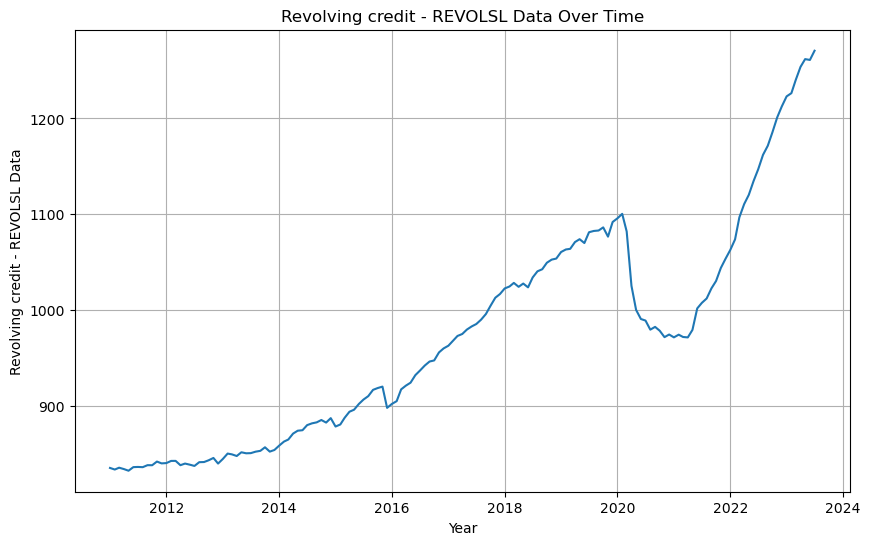

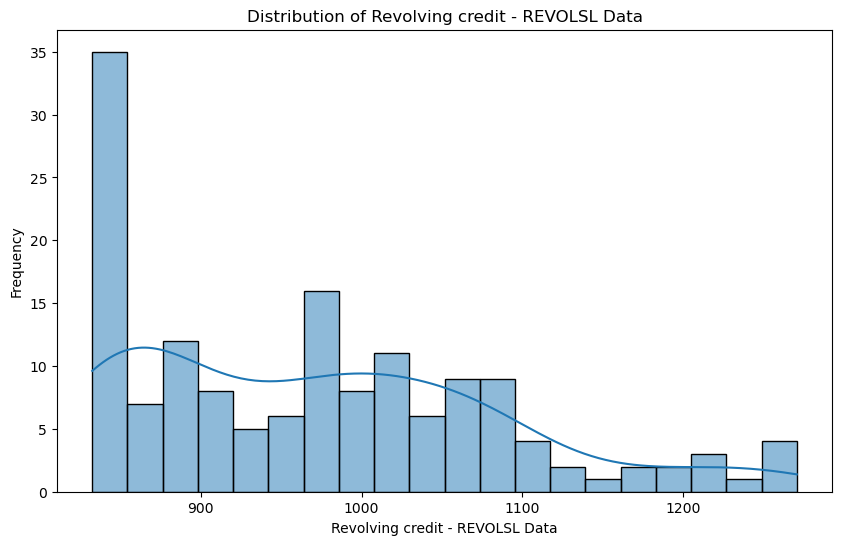

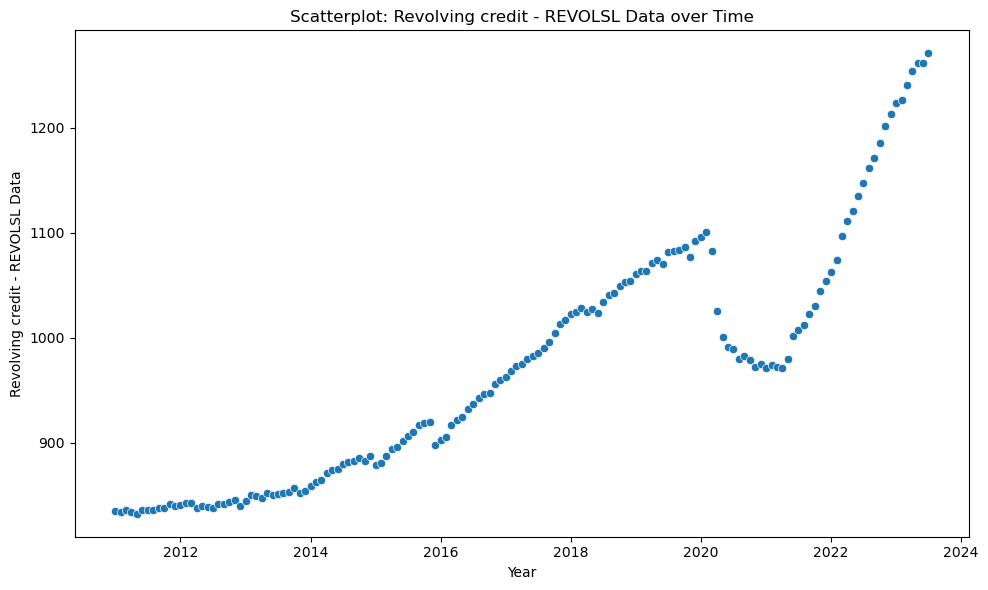

In [58]:
#  SCENARIO 1
# Revolving Consumer Credit Owned and Securitized from FRED

# This line plot shows an overall increasing trend in revolving credit from 2011 to the present, indicating growing card debt.
# The histogram highlights that the distribution of revolving credit is right skewed, with most values concentrating on the lower end
# The scatter plot illustrates the upward trend in revolving credit over time, suggesting an increase in consumer credit card usage

analyze_scenario_data(scenario_name='Revolving credit', fred_codes=['REVOLSL'])

Scenario 2: Mortgage Relationship Analysis - MORTGAGE30US Data:
            MORTGAGE30US
DATE                    
2011-01-06          4.77
2011-01-13          4.71
2011-01-20          4.74
2011-01-27          4.80
2011-02-03          4.81
Scenario 2: Mortgage Relationship Analysis - CSUSHPINSA Data:
            CSUSHPINSA
DATE                  
2011-01-01     139.040
2011-02-01     137.735
2011-03-01     137.788
2011-04-01     139.160
2011-05-01     140.694


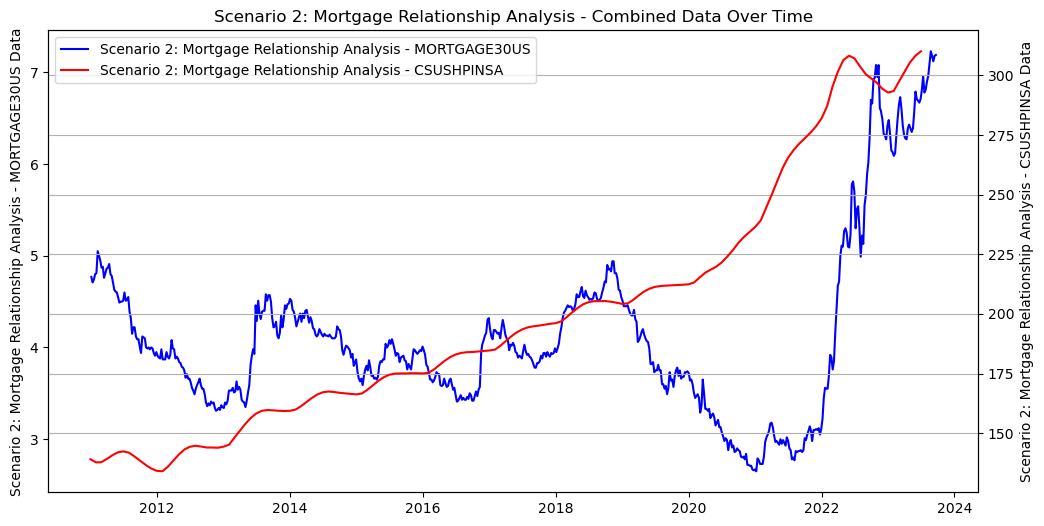

In [59]:
# Scenario 2: Mortgage Analysis
analyze_scenario_data(scenario_name='Scenario 2: Mortgage Relationship Analysis', fred_codes=['MORTGAGE30US', 'CSUSHPINSA'])

# The time series plot reveals an intriguing relationship between mortgage interest rates and the All-Transactions House Price Index.

Scenario 3: Business Construction Loan - CLDACBW027SBOG Data:
            CLDACBW027SBOG
DATE                      
2015-01-07        223.6508
2015-01-14        224.3917
2015-01-21        225.2746
2015-01-28        226.1361
2015-02-04        226.9760


<Figure size 1000x600 with 0 Axes>

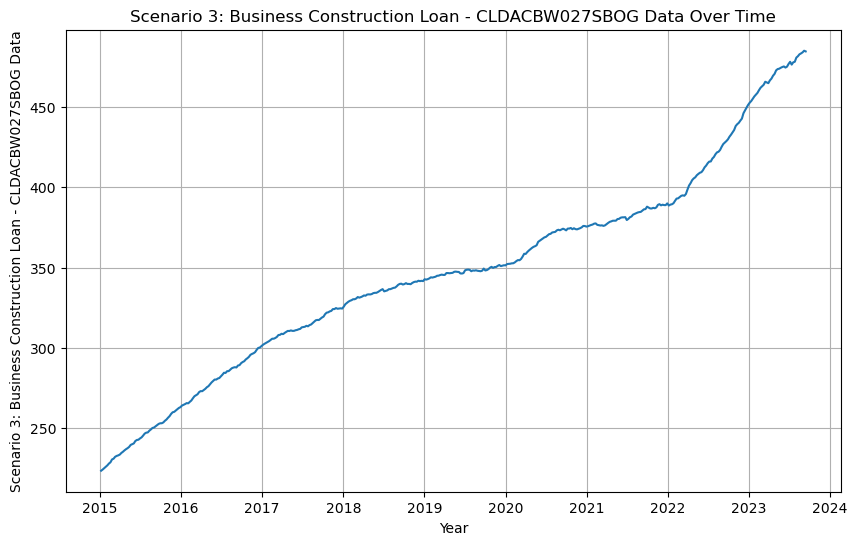

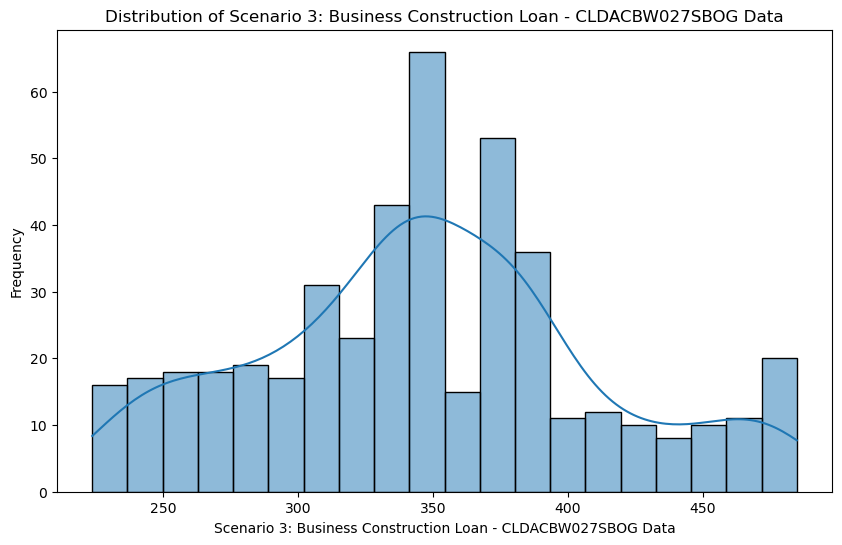

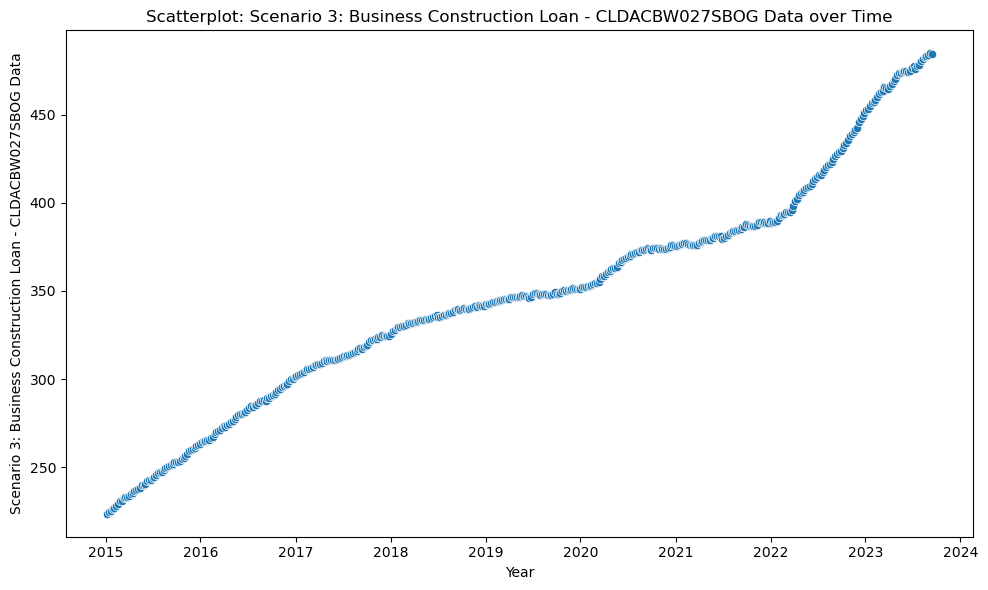

In [60]:
# Scenario 3: Real Estate Loans: Commercial Real Estate Loans: Construction and Land Development Loans, All Commercial Banks from FRED
scenario_name = "Scenario 3: Business Construction Loan"
fred_codes = ["CLDACBW027SBOG"] 

# Calling the function to perform Exploratory Data Analysis
analyze_scenario_data(scenario_name, fred_codes)

# Insight 1: The time series plot shows a consistent increase in Commercial Real Estate Construction and Land Development Loans from 2011 to the present, reflecting a growing demand for such loans.
# Insight 2: The histogram indicates a distribution of Commercial Real Estate Construction and Land Development Loans that closely resembles a normal distribution, suggesting a balanced spread of loan values.


In [71]:
# Function to pull data from Yahoo Finance and display graphs

def analyze_scenario_yahoo_finance(stock_symbol):
    """
    Perform Exploratory Data Analysis (EDA) for Scenario 4: Publicly Traded Equity (Securities Lending of a Stock).
    
    Args:
        stock_symbol (str): The symbol of the publicly traded equity (e.g., AAPL for Apple).
    """
    # Define the date range for historical data (from January 1, 2011, to the present date)
    start_date = datetime.date(2011, 1, 1)
    end_date = datetime.date.today()  # Use today's date as the end date

    # Fetch historical data using yfinance
    stock_data = yfin.download(stock_symbol, start=start_date, end=end_date)

    # Create Time Series Plot
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label=f"{stock_symbol} Close Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.title(f"{stock_symbol} Stock Price Over Time")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    # Create Distribution Plot
    plt.figure(figsize=(12, 6))
    plt.hist(stock_data['Close'], bins=50, color='green', alpha=0.7)
    plt.xlabel("Closing Price (USD)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {stock_symbol} Closing Prices")
    plt.grid(True)
    plt.show()


[*********************100%%**********************]  1 of 1 completed


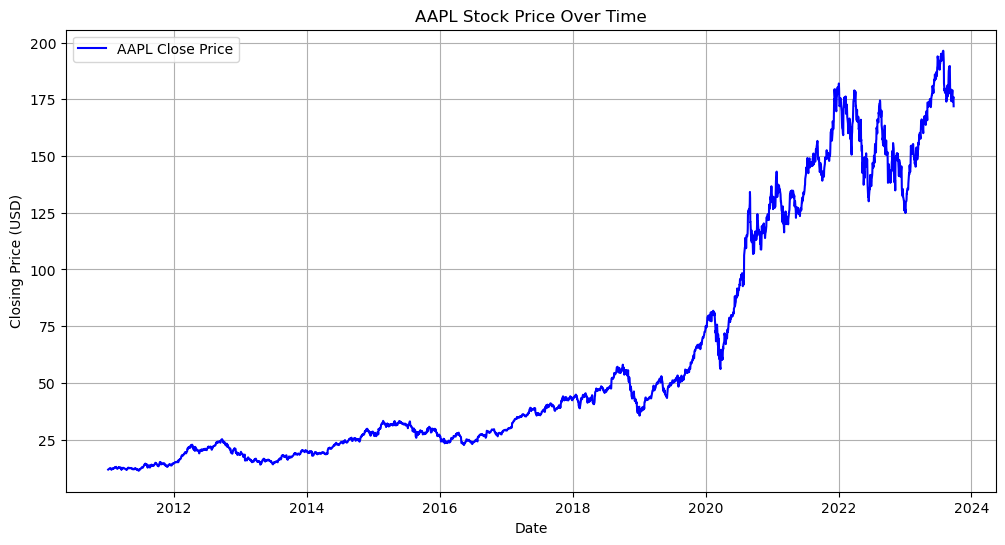

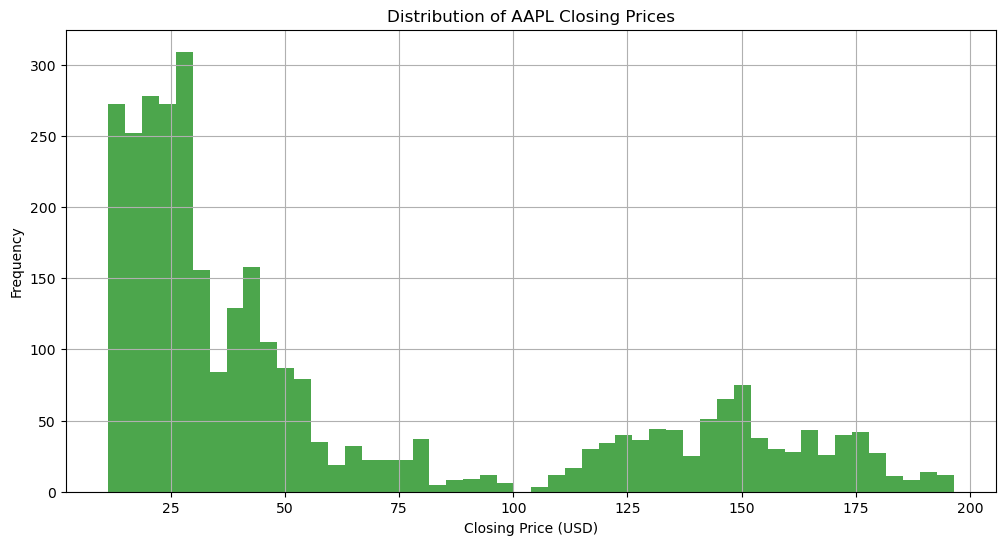

In [72]:
# SCENARIO 4

analyze_scenario_yahoo_finance("AAPL")
# - The time series plot shows the historical stock price of Apple (AAPL) from 2011 to the present.
# - The distribution plot illustrates the distribution of closing prices, indicating the spread and frequency of price values.

[*********************100%%**********************]  1 of 1 completed


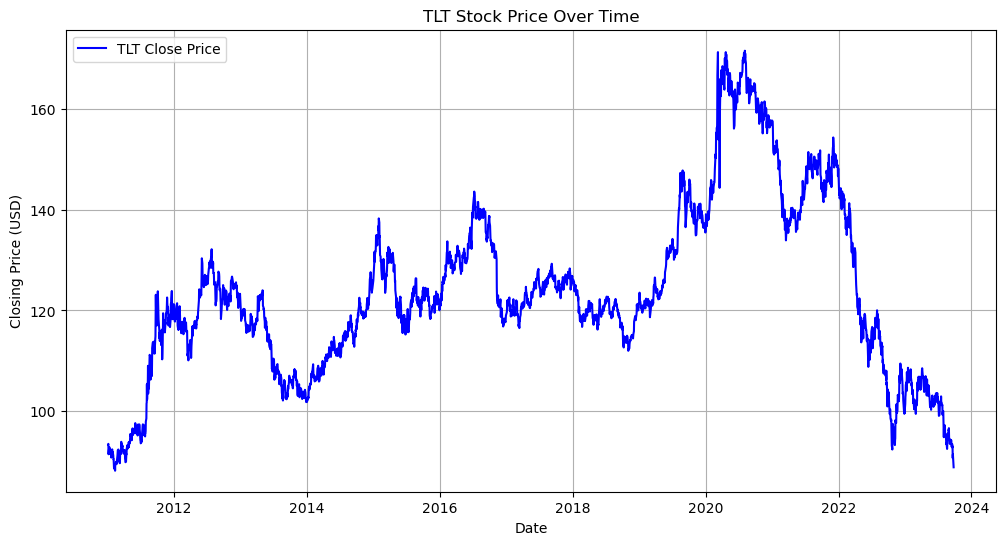

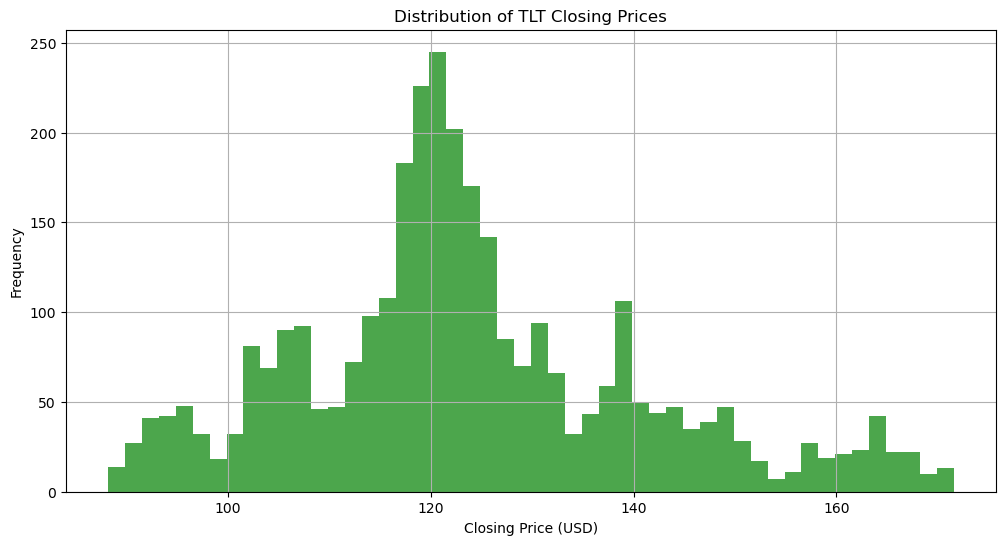

In [73]:
# Scenario 5

analyze_scenario_yahoo_finance("TLT")

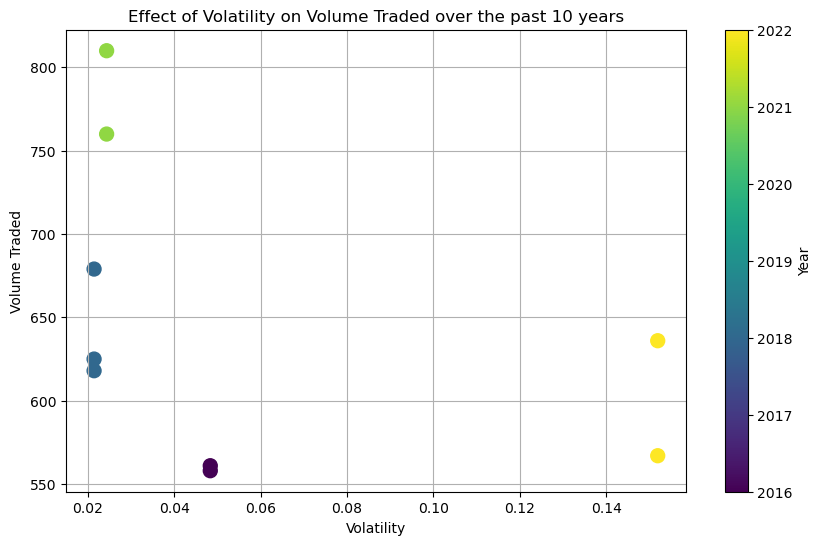

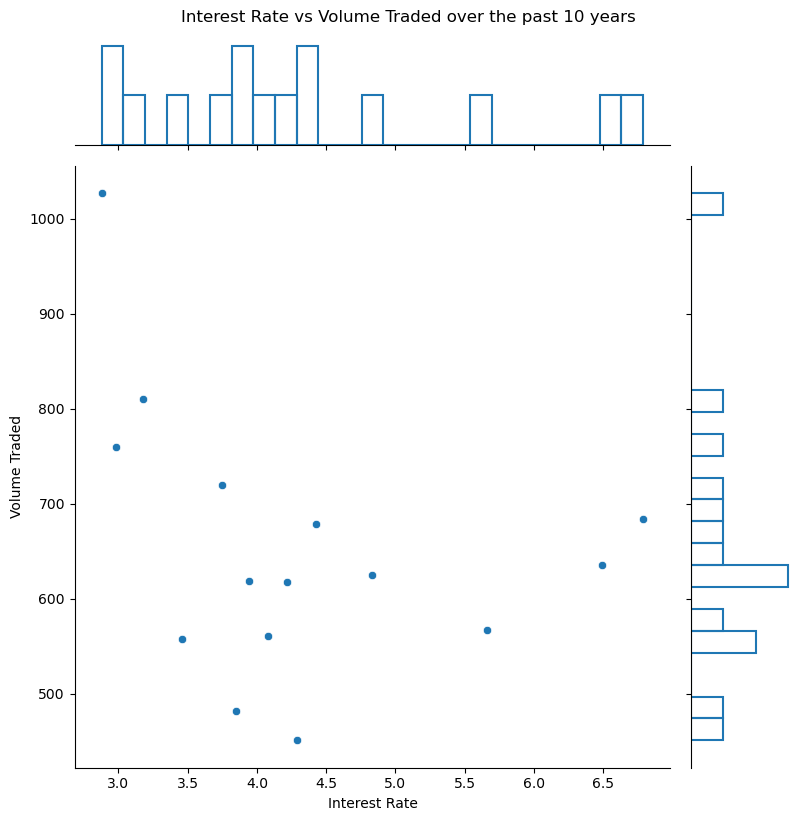

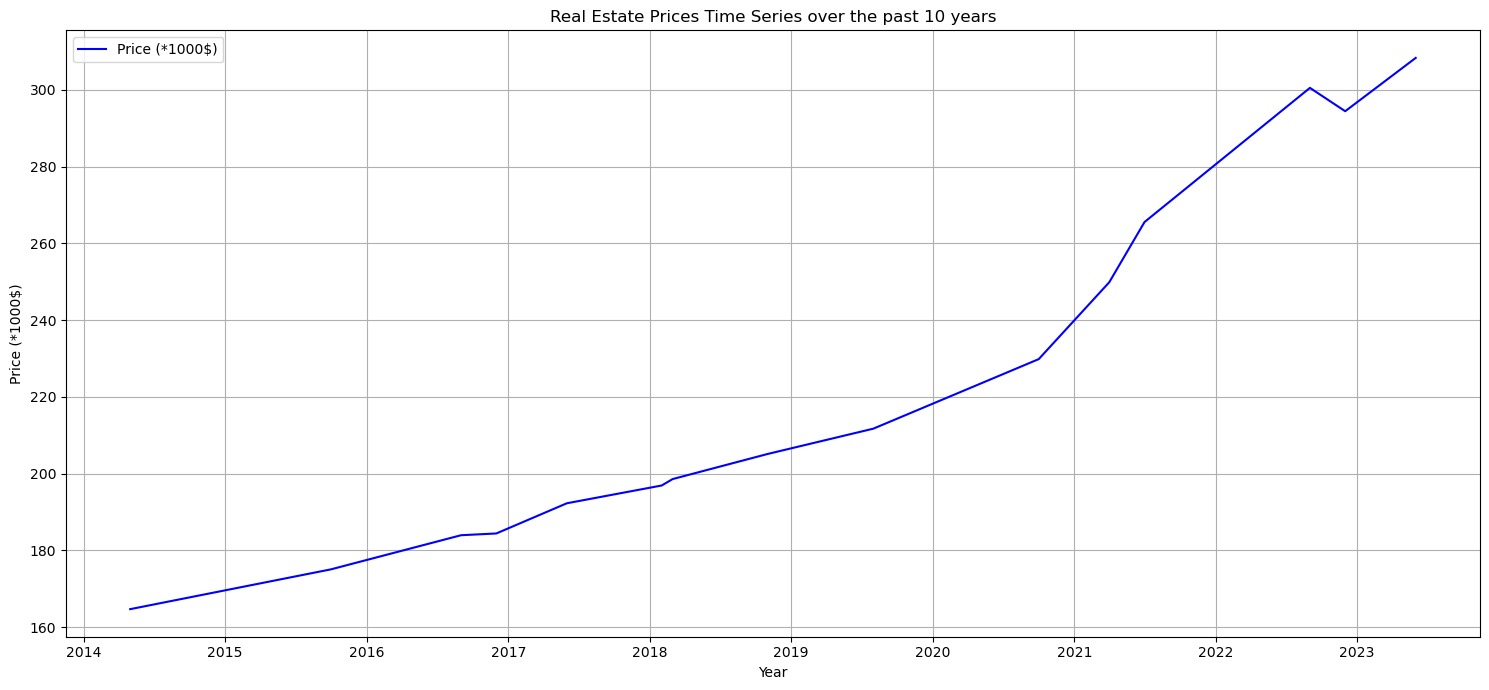

In [10]:
#FOR OUR SCENARIO 6, WE PICK REAL ESTATE AS OUR ILLIQUID SECURITY, CONSIDERING ITS PRICES, INTEREST RATE, VOLUME TRADED AND VOLATILITY
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

api_key = '9408081e16ebf5ba61625f81b50f9f96'

interest_rate_series_id = 'MORTGAGE30US'  # 30-Year Mortgage Rate
volume_traded_series_id = 'HSN1F'  # New One Family Houses Sold: United States
price_series_id = 'CSUSHPINSA'  # S&P/Case-Shiller U.S. National Home Price Index

base_url = 'https://api.stlouisfed.org/fred/series/observations'

def get_data(series_id):
    url = f'{base_url}?series_id={series_id}&api_key={api_key}&file_type=json'
    response = requests.get(url)
    data = response.json()['observations']
    return pd.DataFrame(data)

# Fetch Data
interest_rate_df = get_data(interest_rate_series_id)
volume_traded_df = get_data(volume_traded_series_id)
price_df = get_data(price_series_id)

interest_rate_df['value'] = pd.to_numeric(interest_rate_df['value'], errors='coerce')
volume_traded_df['value'] = pd.to_numeric(volume_traded_df['value'], errors='coerce')
price_df['value'] = pd.to_numeric(price_df['value'], errors='coerce')

# Merge data
merged_df = pd.merge(interest_rate_df[['date', 'value']], volume_traded_df[['date', 'value']], on='date', suffixes=('_interest_rate', '_volume_traded'))
merged_df = pd.merge(merged_df, price_df[['date', 'value']], on='date')
merged_df.columns = ['Date', 'Interest Rate', 'Volume Traded', 'Price (*1000$)']

merged_df.dropna(subset=['Interest Rate', 'Volume Traded', 'Price (*1000$)'], inplace=True)
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

# Calculate volatility
merged_df['Returns'] = merged_df['Price (*1000$)'].pct_change()
merged_df['Volatility'] = merged_df.groupby('Year')['Returns'].transform(lambda x: x.std() * np.sqrt(len(x)))

# Filter the last 10 years' data
start_year = merged_df['Year'].max() - 9
filtered_df = merged_df[merged_df['Year'] >= start_year]

# Plot Volatility vs Volume Traded
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Volatility'], filtered_df['Volume Traded'], c=filtered_df['Year'], cmap='viridis', s=100)
plt.colorbar(label='Year')
plt.xlabel('Volatility')
plt.ylabel('Volume Traded')
plt.title('Effect of Volatility on Volume Traded over the past 10 years')
plt.grid(True)
plt.show()

# Plot Interest Rate vs Volume Traded
sns.jointplot(x='Interest Rate', y='Volume Traded', data=filtered_df, kind='scatter', height=8, marginal_kws=dict(bins=25, fill=False))
plt.suptitle('Interest Rate vs Volume Traded over the past 10 years', y=1.02)
plt.show()

# Time Series Plot for Real Estate
plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(filtered_df['Date']), filtered_df['Price (*1000$)'], label='Price (*1000$)', color='b')
plt.title('Real Estate Prices Time Series over the past 10 years')
plt.xlabel('Year')
plt.ylabel('Price (*1000$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()